<a href="https://colab.research.google.com/github/RewGuardiano/AI_Module_Assignment/blob/main/Soduku_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def generate_indiviual():
  sudoku = np.zeros((9,9), dtype=int)  # Initialize empty grid
  for i in range(9):
    numbers = list(range(1,10))
    random.shuffle(numbers)
    sudoku[i]= numbers
  return sudoku

In [ ]:
sudoku_grid = generate_indiviual()
print(sudoku_grid)

[[9 1 2 3 5 8 7 6 4]
 [9 8 2 6 7 1 3 5 4]
 [4 5 6 1 2 8 7 9 3]
 [3 1 7 4 9 2 6 8 5]
 [5 3 2 6 1 7 8 9 4]
 [3 4 9 1 6 7 8 5 2]
 [8 6 3 7 9 1 4 5 2]
 [2 3 6 8 9 7 1 5 4]
 [4 2 7 5 9 1 6 3 8]]


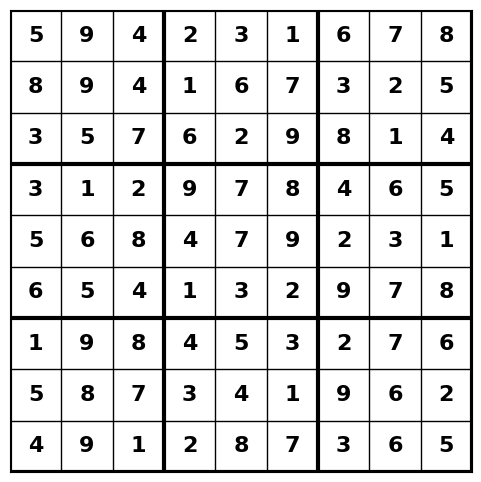

In [ ]:
# Visualize the Sudoku grid with proper alignment
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Ensure equal aspect ratio so that cells are square
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

# Example usage
sudoku_grid = generate_indiviual()  # Generate Sudoku
visualize_sudoku(sudoku_grid)  # Display Sudoku


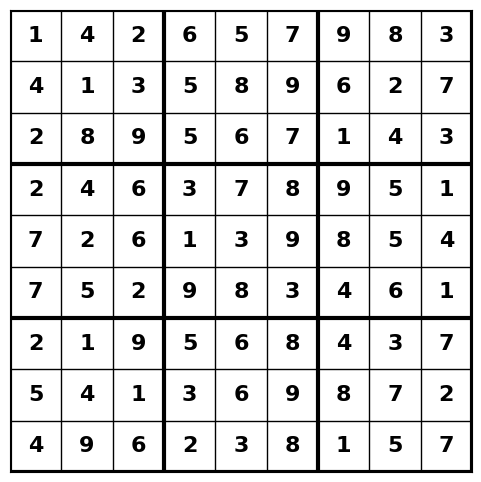

Total cost: 60
Column duplicate indices: [(3, 0), (5, 0), (6, 0), (8, 0), (3, 1), (6, 1), (7, 1), (4, 2), (5, 2), (6, 2), (8, 2), (2, 3), (6, 3), (7, 3), (5, 4), (6, 4), (7, 4), (8, 4), (2, 5), (4, 5), (6, 5), (7, 5), (8, 5), (3, 6), (6, 6), (7, 6), (8, 6), (4, 7), (8, 7), (2, 8), (5, 8), (6, 8), (8, 8)]
Subgrid duplicate indices: [(1, 0), (1, 1), (2, 0), (1, 3), (2, 3), (2, 4), (2, 5), (2, 8), (4, 1), (4, 2), (5, 0), (5, 2), (4, 4), (5, 3), (5, 4), (5, 5), (4, 7), (5, 6), (5, 8), (7, 2), (8, 0), (8, 1), (7, 4), (8, 4), (8, 5), (7, 7), (8, 8)]


In [3]:
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Draws Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Draws Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

def check_cost(sudoku):
  #lists
    column_duplicates = []
    subgrid_duplicates = []

    # Check columns
    column_cost = 0
    for col in range(9):
      #dictionary to keep track of numbers already encountered
        seen = {}
        for row in range(9):
            num = sudoku[row, col]
            if num in seen:
                column_duplicates.append((row, col))
                column_cost += 1
            else:
                seen[num] = (row, col) #else stores its indices coordinates if not a duplicate

    # Check 3x3 subgrids
    subgrid_cost = 0
    for box_row in range(3):
        for box_col in range(3):
            seen = {}
            #inner for loops iterate through the cells inside the subgrids
            for i in range(3):
                for j in range(3):
                    row = box_row * 3 + i
                    col = box_col * 3 + j
                    num = sudoku[row, col]
                    if num in seen:
                        subgrid_duplicates.append((row, col))
                        subgrid_cost += 1
                    else:
                        seen[num] = (row, col)

    total_cost = column_cost + subgrid_cost
    return total_cost, column_duplicates, subgrid_duplicates

# Generate a random Sudoku grid
sudoku_grid = generate_indiviual()

# Visualize the Sudoku grid
visualize_sudoku(sudoku_grid)

#calculating cost
cost, column_duplicates, subgrid_duplicates = check_cost(sudoku_grid)
# Print results
print("Total cost:", cost)
if cost == 0:
    print("The Sudoku grid is perfect!")
else:
    print("Column duplicate indices:", column_duplicates)
    print("Subgrid duplicate indices:", subgrid_duplicates)

In [4]:
def crossover_function(parent1,parent2):

# Create copies to avoid modifying the parents
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    # Select a subset of rows to crossover
    num_rows = random.randint(2, 4)
    crossover_rows = random.sample(range(9), num_rows)

    for row in crossover_rows:
        # Generate two crossover points
        cx_point1, cx_point2 = sorted(random.sample(range(9), 2))

        # Create mapping between parents for this segment
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]

        # Apply segment from second parent to first offspring
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]

        # Apply segment from first parent to second offspring
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]

        # Fix the remaining elements in the row to ensure 1-9 appear exactly once
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                # Fix offspring1
                while offspring1[row, i] in offspring1[row, cx_point1:cx_point2+1]:
                    offspring1[row, i] = mapping.get(offspring1[row, i], offspring1[row, i])

                # Fix offspring2
                while offspring2[row, i] in offspring2[row, cx_point1:cx_point2+1]:
                    offspring2[row, i] = mapping.get(offspring2[row, i], offspring2[row, i])

    # Randomly select one of the two offspring to return
    return offspring1 if random.random() < 0.5 else offspring2

Parent 1:


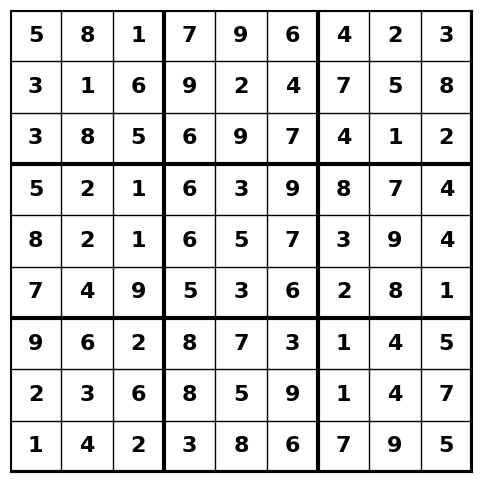

Parent 2:


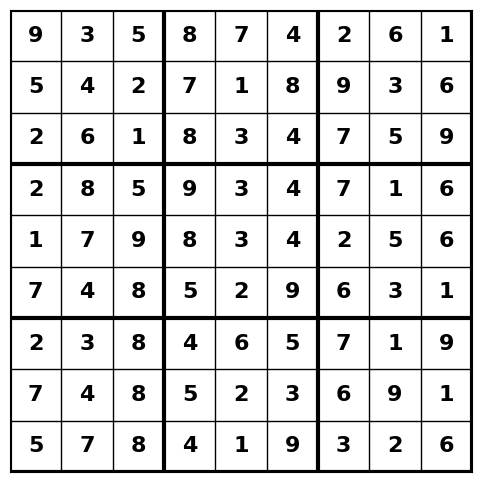

Offspring 1:


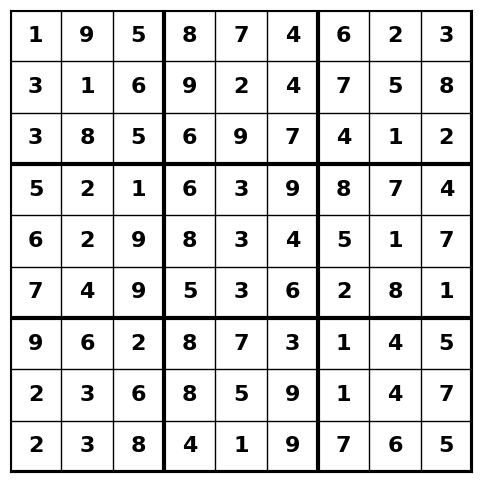

Offspring 2:


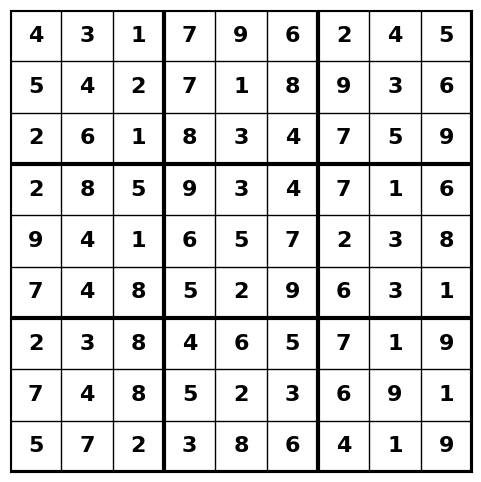

Offspring 1 Cost: 49
Offspring 2 Cost: 55


In [ ]:
def test_crossover():
    parent1 = generate_indiviual()
    parent2 = generate_indiviual()

    # Set specific crossover rows and points
    crossover_rows = [0, 4, 8]
    cx_point1, cx_point2 = 2, 5  # Crossover points in the middle

    # Create copies
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    # Perform crossover on specific rows
    for row in crossover_rows:
        # Create mapping
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]

        # Apply segment from second parent to first offspring
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]

        # Apply segment from first parent to second offspring
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]

        # Fix the remaining elements
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                # Fix for offspring1
                current_value = offspring1[row, i]
                # Get all values in the crossover section
                crossover_values = set(offspring1[row, cx_point1:cx_point2+1])

                attempts = 0
                max_attempts = 100  # Arbitrary limit to prevent infinite loops

                while current_value in crossover_values and attempts < max_attempts:
                    current_value = mapping.get(current_value, current_value)
                    attempts += 1

                    # If we're stuck in a loop, pick a random valid value
                    if attempts >= max_attempts:
                        # Find values not in this row
                        used_values = set(offspring1[row, :])
                        available_values = set(range(1, 10)) - used_values

                        # If there are available values, pick one
                        if available_values:
                            current_value = min(available_values)  # Just pick the smallest for determinism
                        # If no valid values (shouldn't happen in a valid Sudoku), keep original

                offspring1[row, i] = current_value

                # Fix for offspring2 (similar logic)
                current_value = offspring2[row, i]
                crossover_values = set(offspring2[row, cx_point1:cx_point2+1])

                attempts = 0
                while current_value in crossover_values and attempts < max_attempts:
                    current_value = mapping.get(current_value, current_value)
                    attempts += 1

                    if attempts >= max_attempts:
                        used_values = set(offspring2[row, :])
                        available_values = set(range(1, 10)) - used_values

                        if available_values:
                            current_value = min(available_values)

                offspring2[row, i] = current_value

    # Visualize and check results
    print("Parent 1:")
    visualize_sudoku(parent1)

    print("Parent 2:")
    visualize_sudoku(parent2)

    print("Offspring 1:")
    visualize_sudoku(offspring1)

    print("Offspring 2:")
    visualize_sudoku(offspring2)

    # Check costs
    cost_o1, _, _ = check_cost(offspring1)
    cost_o2, _, _ = check_cost(offspring2)
    print(f"Offspring 1 Cost: {cost_o1}")
    print(f"Offspring 2 Cost: {cost_o2}")

# Run the specific test
test_crossover()

In [5]:
def mutation_function(sudoku, fixed_positions, mutation_rate=0.1):

    mutated_sudoku = sudoku.copy()

    for row in range(9):
        if random.random() < mutation_rate:

            swap_index1, swap_index2 = random.sample([i for i in range(9) if not fixed_positions[row, i]], 2)

            mutated_sudoku[row, swap_index1], mutated_sudoku[row, swap_index2] = \
            mutated_sudoku[row, swap_index2], mutated_sudoku[row, swap_index1]

    return mutated_sudoku

In [13]:
# Tournament selection
def tournament_selection(population, tournament_size=3):
    participants = random.sample(population, tournament_size)
    return min(participants, key=lambda x: x['cost'])


In [15]:
# Optimized GA
def run_genetic_sudoku():
    # Parameters
    population_size = 30
    max_generations = 100
    elitism_size = 5
    offspring_per_gen = int(population_size * 0.1)  # 20% of population
    fixed_positions = np.zeros((9, 9), dtype=bool)  # No fixed clues for simplicity

    # Initialize population
    population = [{'grid': generate_individual(), 'cost': None} for _ in range(population_size)]
    for ind in population:
        ind['cost'] = check_cost(ind['grid'])

    best_solution = min(population, key=lambda x: x['cost'])
    print(f"Initial best cost: {best_solution['cost']}")

    # Main loop
    for gen in range(max_generations):
        # Elitism: preserve top individuals
        population.sort(key=lambda x: x['cost'])
        new_population = population[:elitism_size]

        # Generate offspring
        while len(new_population) < population_size:
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            offspring_grid = crossover_function(parent1['grid'], parent2['grid'])
            offspring_grid = mutation_function(offspring_grid, fixed_positions, mutation_rate=0.05)
            offspring = {'grid': offspring_grid, 'cost': check_cost(offspring_grid)}
            new_population.append(offspring)

        population = new_population[:population_size]  # Cull to population_size

        # Update best solution
        current_best = min(population, key=lambda x: x['cost'])
        if current_best['cost'] < best_solution['cost']:
            best_solution = deepcopy(current_best)
            print(f"Generation {gen}: Best cost = {best_solution['cost']}")

        # Early termination
        if best_solution['cost'] == 0:
            print(f"Solution found at generation {gen}")
            break

    return best_solution

# Run and visualize
best = run_genetic_sudoku()
print(f"Final best cost: {best['cost']}")
visualize_sudoku(best['grid'])

Initial best cost: 43


KeyboardInterrupt: 

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy

# Individual generation (unchanged)
def generate_individual():
    sudoku = np.zeros((9, 9), dtype=int)
    for i in range(9):
        numbers = list(range(1, 10))
        random.shuffle(numbers)
        sudoku[i] = numbers
    return sudoku

# Crossover function (unchanged)
def crossover_function(parent1, parent2):
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()
    num_rows = random.randint(2, 4)
    crossover_rows = random.sample(range(9), num_rows)
    for row in crossover_rows:
        cx_point1, cx_point2 = sorted(random.sample(range(9), 2))
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                while offspring1[row, i] in offspring1[row, cx_point1:cx_point2+1]:
                    offspring1[row, i] = mapping.get(offspring1[row, i], offspring1[row, i])
                while offspring2[row, i] in offspring2[row, cx_point1:cx_point2+1]:
                    offspring2[row, i] = mapping.get(offspring2[row, i], offspring2[row, i])
    return offspring1 if random.random() < 0.5 else offspring2

# Mutation function (unchanged, adjusted rate)
def mutation_function(sudoku, fixed_positions, mutation_rate=0.05):
    mutated_sudoku = sudoku.copy()
    for row in range(9):
        if random.random() < mutation_rate:
            swap_index1, swap_index2 = random.sample([i for i in range(9) if not fixed_positions[row, i]], 2)
            mutated_sudoku[row, swap_index1], mutated_sudoku[row, swap_index2] = \
                mutated_sudoku[row, swap_index2], mutated_sudoku[row, swap_index1]
    return mutated_sudoku

# Your cost function (unchanged)
def check_cost(sudoku):
    cost = 0
    for col in range(9):
        cost += 9 - len(np.unique(sudoku[:, col]))
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            cost += 9 - len(np.unique(sudoku[i:i+3, j:j+3]))
    return cost

# Tournament selection
def tournament_selection(population, tournament_size=3):
    participants = random.sample(population, tournament_size)
    return min(participants, key=lambda x: x['cost'])

# Optimized GA
def run_genetic_sudoku():
    population_size = 100
    max_generations = 500
    elitism_size = 5
    offspring_per_gen = int(population_size * 0.2)
    fixed_positions = np.zeros((9, 9), dtype=bool)  # Adjust if you have clues

    # Initialize population
    population = [{'grid': generate_individual(), 'cost': None} for _ in range(population_size)]
    for ind in population:
        ind['cost'] = check_cost(ind['grid'])

    best_solution = min(population, key=lambda x: x['cost'])
    print(f"Initial best cost: {best_solution['cost']}")

    # Main loop
    for gen in range(max_generations):
        population.sort(key=lambda x: x['cost'])
        new_population = population[:elitism_size]

        while len(new_population) < population_size:
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            offspring_grid = crossover_function(parent1['grid'], parent2['grid'])
            offspring_grid = mutation_function(offspring_grid, fixed_positions, mutation_rate=0.05)
            offspring = {'grid': offspring_grid, 'cost': check_cost(offspring_grid)}
            new_population.append(offspring)

        population = new_population[:population_size]
        current_best = min(population, key=lambda x: x['cost'])
        if current_best['cost'] < best_solution['cost']:
            best_solution = deepcopy(current_best)
            print(f"Generation {gen}: Best cost = {best_solution['cost']}")

        if best_solution['cost'] == 0:
            print(f"Solution found at generation {gen}")
            break

    return best_solution

# Visualize function (unchanged from your code)
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center', fontsize=16, fontweight='bold')
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

# Run it
best = run_genetic_sudoku()
print(f"Final best cost: {best['cost']}")
visualize_sudoku(best['grid'])

Initial best cost: 42
